In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/Users/stevengeorge/Documents/Github/fpl-analysis')

from src.models.utils import _load_all_historical_data

pd.options.display.max_columns = None

In [2]:
full_data = _load_all_historical_data()
REORDERED_COLUMNS = ['name', 'team_name', 'gw', 'season'] + \
    [e for e in full_data.columns if e not in ('name', 'team_name', 'gw', 'season')]
full_data = full_data[REORDERED_COLUMNS]
print(full_data.shape)
full_data.head()

2019-10-24 20:18:30,158 - Loading raw historical FPL data


(67834, 52)


,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


## Any gaps between GWs?

### Between seasons

Looking at any cases where a player might play GW 38 of one season but only starts in GW 5 of the following season. In these cases this should not be considered as a single time series but rather separate time series. Or remove entirely from dataset.

In [3]:
gw_check_seas_data = full_data.copy()

In [4]:
gw_check_seas_data.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [5]:
gw_check_seas_data.sort_values(['name', 'season', 'gw'], inplace=True)

In [6]:
gw_check_seas_data['next_row_gw'] = gw_check_seas_data.groupby(['name'])['gw'].shift(-1)

In [7]:
gw_check_seas_data['next_row_gw_jump'] = gw_check_seas_data['next_row_gw'] - gw_check_seas_data['gw']

In [9]:
gw_check_seas_data.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,2.0,1.0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3.0,1.0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,4.0,1.0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5.0,1.0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,6.0,1.0


Expect `next_row_gw_jump` to be -37 at GW 38 if plays GW 1 of following season

In [10]:
gw_check_seas_data[gw_check_seas_data['gw'] == 38]['next_row_gw_jump'].value_counts(dropna=False)

 NaN     1090
-37.0     793
-13.0       8
-12.0       5
-15.0       5
-36.0       5
-19.0       4
-27.0       4
-34.0       4
-31.0       3
-32.0       3
-26.0       3
-35.0       3
 0.0        3
-30.0       2
-29.0       2
-20.0       2
-16.0       2
-23.0       1
-18.0       1
-4.0        1
-33.0       1
-22.0       1
-9.0        1
-10.0       1
-28.0       1
-14.0       1
-17.0       1
-3.0        1
Name: next_row_gw_jump, dtype: int64

__Quick check of nulls__

In [16]:
gw_check_seas_data[
    (gw_check_seas_data['gw'] == 38) &
    (gw_check_seas_data['next_row_gw_jump'].isnull())
]['season'].value_counts()

2018-19    622
2016-17    238
2017-18    230
Name: season, dtype: int64

Check that in cases where `null` occurs in 2016-17 or 2017-18 then the player is also _not_ present in subsequent seasons. This should be the case by construct but worth double checking.

In [17]:
names_to_check = gw_check_seas_data[
    (gw_check_seas_data['gw'] == 38) &
    (gw_check_seas_data['next_row_gw_jump'].isnull()) &
    (gw_check_seas_data['season'] == '2016-17')
]['name']

gw_check_seas_data[gw_check_seas_data['name'].isin(names_to_check)]['season'].unique()

array(['2016-17'], dtype=object)

In [18]:
names_to_check = gw_check_seas_data[
    (gw_check_seas_data['gw'] == 38) &
    (gw_check_seas_data['next_row_gw_jump'].isnull()) &
    (gw_check_seas_data['season'] == '2017-18')
]['name']

gw_check_seas_data[gw_check_seas_data['name'].isin(names_to_check)]['season'].unique()

array(['2016-17', '2017-18'], dtype=object)

__Investigate cases where jump not equal to -37__

In [19]:
gw_check_seas_data[
    (gw_check_seas_data['gw'] == 38) &
    (gw_check_seas_data['next_row_gw_jump'] == -13)
]

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
22998,carl_stewart,Watford,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,432,5,0,0.0,0,3,25,22,4.5,True,0,0,0,0,0,0,1,Manchester City,0,1,0,0,180,0,0,0,0,0,0,0,0,0,1,25.0,-13.0
46112,curtis_jones,Liverpool,38,2017-18,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,199,0,4,0.0,0,27,54,27,4.5,True,0,0,1,0,0,0,1,Brighton & Hove Albion,1,0,0,0,228,0,0,0,0,0,0,0,0,0,1,25.0,-13.0
7142,gerard_deulofeu,Everton,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,35806,1,3,0.0,0,-49,13,62,5.9,False,0,0,0,0,0,0,1,Arsenal,0,1,0,0,390,0,0,0,0,0,0,0,0,0,1,25.0,-13.0
7978,håvard_nordtveit,West Ham United,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,2775,2,1,0.0,0,11,19,8,4.7,False,0,0,0,0,0,0,1,Burnley,1,0,0,0,432,0,0,0,0,0,0,0,0,0,1,25.0,-13.0
11778,lazar_markovic,Hull City,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,6708,7,1,0.0,0,-2417,49,2466,5.2,True,0,1,0,0,0,0,1,Tottenham Hotspur,0,1,0,0,642,0,0,0,0,0,0,0,0,0,1,25.0,-13.0
37016,michy_batshuayi,Chelsea,38,2017-18,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,29103,0,3,0.0,0,-23,11,34,8.1,False,0,0,1,0,1,0,0,Newcastle United,1,0,0,0,775,0,0,0,0,0,0,0,0,0,1,25.0,-13.0
38688,peter_crouch,Stoke City,38,2017-18,0,0,25,0,5.2,1,1,5.5,28.6,90,0,0,0,0,0,140701,2,1,21.0,5,3255,6788,3533,4.8,False,1,0,0,0,1,0,0,Swansea City,0,0,0,0,863,0,0,0,0,0,0,0,0,0,1,25.0,-13.0
16262,reece_oxford,West Ham United,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,12032,2,1,0.0,0,-38,9,47,4.2,False,0,0,0,1,0,0,0,Burnley,1,0,0,0,888,0,0,0,0,0,0,0,0,0,1,25.0,-13.0


In [20]:
gw_check_seas_data[
    (gw_check_seas_data['name'] == 'gerard_deulofeu') &
    (gw_check_seas_data['season'] == '2017-18')
].head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
45742,gerard_deulofeu,Watford,25,2017-18,0,0,16,1,34.8,0,0,6.1,15.0,87,0,0,0,0,0,2386,0,0,11.0,3,2332,2530,198,6.0,False,0,0,0,0,0,0,1,Stoke City,0,0,1,0,390,0,0,0,0,0,1,0,0,0,0,26.0,1.0
45743,gerard_deulofeu,Watford,26,2017-18,1,3,42,0,48.3,1,1,12.2,39.8,88,0,0,0,0,0,13626,1,4,34.0,13,10902,12657,1755,6.0,True,0,0,0,0,0,0,1,Chelsea,0,1,1,0,390,0,0,0,0,0,0,1,0,0,0,27.0,1.0
45744,gerard_deulofeu,Watford,27,2017-18,0,0,11,0,13.8,1,0,4.1,12.2,74,0,0,0,0,0,204123,0,2,15.0,2,186550,192100,5550,6.0,False,0,0,0,0,0,0,1,West Ham United,0,0,0,0,390,0,0,0,0,0,0,1,0,0,0,28.0,1.0
45745,gerard_deulofeu,Watford,28,2017-18,0,0,10,1,26.8,0,0,5.0,11.2,62,0,0,0,0,0,241038,0,1,12.0,3,32988,58861,25873,6.0,True,0,0,0,0,0,0,1,Everton,0,0,1,0,390,0,0,0,0,0,0,1,0,0,0,29.0,1.0
45746,gerard_deulofeu,Watford,29,2017-18,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,112014,0,1,0.0,0,-128174,1371,129545,5.9,True,0,0,0,0,0,0,1,West Bromwich Albion,0,0,0,0,390,0,0,0,0,0,0,0,1,0,0,30.0,1.0


In [21]:
gw_check_seas_data[
    (gw_check_seas_data['name'] == 'peter_crouch') &
    (gw_check_seas_data['season'] == '2018-19')
].head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
67628,peter_crouch,Burnley,25,2018-19,1,0,11,0,0.1,0,0,2.5,0.0,14,0,0,0,0,0,23981,1,1,26.0,4,16803,18027,1224,4.5,True,0,0,0,0,1,0,0,Southampton,0,0,0,0,863,0,0,0,0,0,0,1,0,0,0,26.0,1.0
67629,peter_crouch,Burnley,26,2018-19,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,65277,3,1,0.0,0,45149,51771,6622,4.5,False,0,0,0,0,1,0,0,Brighton & Hove Albion,0,0,1,0,863,0,0,0,0,0,0,1,0,0,0,27.0,1.0
67630,peter_crouch,Burnley,27,2018-19,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,75923,1,2,0.0,0,10565,21293,10728,4.5,True,0,0,0,0,1,0,0,Tottenham Hotspur,0,1,0,1,863,0,0,0,0,0,0,1,0,0,0,28.0,1.0
67631,peter_crouch,Burnley,28,2018-19,0,0,1,0,0.0,0,0,2.0,0.0,19,0,0,0,0,0,78961,0,2,20.0,0,2888,10283,7395,4.5,False,1,0,0,0,1,0,0,Newcastle United,0,0,1,0,863,0,0,0,0,0,0,1,0,0,0,29.0,1.0
67632,peter_crouch,Burnley,29,2018-19,0,0,3,0,0.5,0,0,2.1,3.4,9,0,0,0,0,0,82676,3,1,17.0,1,3469,11374,7905,4.5,True,0,0,0,0,1,0,0,Crystal Palace,0,0,0,0,863,0,0,0,0,0,0,0,1,0,0,30.0,1.0


Looks like examples where players goes on loan away from Premier League then return midway through the next e.g. Deulofeu: Everton --> Milan/Barcelona --> Watford

In [22]:
gw_check_seas_data[
    (gw_check_seas_data['gw'] == 38) &
    (gw_check_seas_data['next_row_gw_jump'] == -3)
]

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
42374,vincent_janssen,Tottenham Hotspur,38,2017-18,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,6454,4,5,0.0,0,0,6,6,7.4,True,0,0,1,0,1,0,0,Leicester City,0,0,0,0,1049,0,0,0,0,0,0,0,0,0,1,35.0,-3.0


In [23]:
gw_check_seas_data[
    (gw_check_seas_data['name'] == 'vincent_janssen') &
    (gw_check_seas_data['season'] == '2018-19')
].head(1)

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
67816,vincent_janssen,Tottenham Hotspur,35,2018-19,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,4.5,False,0,0,1,0,1,0,0,Manchester City,0,1,0,1,1049,0,0,0,0,0,0,0,0,1,0,35.0,0.0


For smaller jumps e.g. 38 in previous season to 35 in next looks like squad players who only play at the end of the season

__Possible solution: Rather than dropping, and losing valuable information, alter names such that they are effectively treated as separate players e.g. add a numeric suffix.__

In [25]:
gw_check_seas_data.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,2.0,1.0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3.0,1.0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,4.0,1.0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5.0,1.0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,6.0,1.0


In [26]:
gw_check_seas_data[gw_check_seas_data['gw'] == 38]['next_row_gw_jump'].value_counts(dropna=False)

 NaN     1090
-37.0     793
-13.0       8
-12.0       5
-15.0       5
-36.0       5
-19.0       4
-27.0       4
-34.0       4
-31.0       3
-32.0       3
-26.0       3
-35.0       3
 0.0        3
-30.0       2
-29.0       2
-20.0       2
-16.0       2
-23.0       1
-18.0       1
-4.0        1
-33.0       1
-22.0       1
-9.0        1
-10.0       1
-28.0       1
-14.0       1
-17.0       1
-3.0        1
Name: next_row_gw_jump, dtype: int64

In [27]:
gw_check_seas_data['jump_between_season_players'] = np.where(
    (gw_check_seas_data['gw'] == 38) & (~gw_check_seas_data['next_row_gw_jump'].isin([np.nan, -37])),
    1,
    0
)

In [35]:
problematic_players = gw_check_seas_data.copy()[gw_check_seas_data['jump_between_season_players'] == 1][['name', 'season', 'next_row_gw_jump']]
print(problematic_players.shape)
problematic_players.head()

(69, 3)


,name,season,next_row_gw_jump
23668,aaron_ramsdale,2016-17,-32.0
22803,aaron_wan-bissaka,2016-17,-20.0
19947,aiden_o'neill,2016-17,-12.0
22329,ainsley_maitland-niles,2016-17,-33.0
22530,alex_palmer,2016-17,-30.0


In [40]:
problematic_players.groupby(['name', 'season']).count().reset_index().shape

(69, 3)

In [50]:
problematic_players.groupby(['name']).count().reset_index().shape

(68, 3)

This means that one player has jump between seasons in 2 separate premier league seasons

In [52]:
find_dup = problematic_players.groupby(['name']).count().reset_index()
find_dup.head()

,name,season,next_row_gw_jump
0,aaron_ramsdale,1,1
1,aaron_wan-bissaka,1,1
2,aiden_o'neill,1,1
3,ainsley_maitland-niles,1,1
4,alex_palmer,1,1


In [55]:
really_bad_player = find_dup[find_dup['season'] > 1]['name'].item()
really_bad_player

'paulo_gazzaniga'

In [58]:
problematic_players['name_adj'] = np.where(
    problematic_players['name'] != really_bad_player,
    problematic_players['name'] + '_01',
    problematic_players['name']
)

In [59]:
problematic_players.head()

,name,season,next_row_gw_jump,name_adj
23668,aaron_ramsdale,2016-17,-32.0,aaron_ramsdale_01
22803,aaron_wan-bissaka,2016-17,-20.0,aaron_wan-bissaka_01
19947,aiden_o'neill,2016-17,-12.0,aiden_o'neill_01
22329,ainsley_maitland-niles,2016-17,-33.0,ainsley_maitland-niles_01
22530,alex_palmer,2016-17,-30.0,alex_palmer_01


In [60]:
problematic_players[problematic_players['name'] == really_bad_player]

,name,season,next_row_gw_jump,name_adj
15540,paulo_gazzaniga,2016-17,-27.0,paulo_gazzaniga
44957,paulo_gazzaniga,2017-18,-34.0,paulo_gazzaniga


In [64]:
problematic_players.loc[
    (problematic_players['name'] == really_bad_player) & (problematic_players['season'] == '2016-17'),
    'name_adj'
] = really_bad_player + '_01'

problematic_players.loc[
    (problematic_players['name'] == really_bad_player) & (problematic_players['season'] == '2017-18'),
    'name_adj'
] = really_bad_player + '_02'

In [65]:
problematic_players[problematic_players['name'] == really_bad_player]

,name,season,next_row_gw_jump,name_adj
15540,paulo_gazzaniga,2016-17,-27.0,paulo_gazzaniga_01
44957,paulo_gazzaniga,2017-18,-34.0,paulo_gazzaniga_02


Merge onto original df

In [69]:
gw_check_seas_data_adj = gw_check_seas_data.merge(problematic_players, on=['name', 'season'], how='left')
assert gw_check_seas_data.shape[0] == gw_check_seas_data_adj.shape[0]

gw_check_seas_data_adj.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump_x,jump_between_season_players,next_row_gw_jump_y,name_adj
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,2.0,1.0,0,NaN,NaN
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3.0,1.0,0,NaN,NaN
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,4.0,1.0,0,NaN,NaN
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5.0,1.0,0,NaN,NaN
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,6.0,1.0,0,NaN,NaN


In [70]:
gw_check_seas_data_adj['name'] = np.where(
    ~gw_check_seas_data_adj['name_adj'].isnull(),
    gw_check_seas_data_adj['name_adj'],
    gw_check_seas_data_adj['name']
)

In [71]:
gw_check_seas_data_adj.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump_x,jump_between_season_players,next_row_gw_jump_y,name_adj
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,2.0,1.0,0,NaN,NaN
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3.0,1.0,0,NaN,NaN
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,4.0,1.0,0,NaN,NaN
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5.0,1.0,0,NaN,NaN
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,6.0,1.0,0,NaN,NaN


In [72]:
gw_check_seas_data_adj.sort_values(['name', 'season', 'gw'], inplace=True)

In [73]:
gw_check_seas_data_adj['next_row_gw'] = gw_check_seas_data_adj.groupby(['name'])['gw'].shift(-1)

In [74]:
gw_check_seas_data_adj['next_row_gw_jump'] = gw_check_seas_data_adj['next_row_gw'] - gw_check_seas_data_adj['gw']

In [75]:
gw_check_seas_data_adj.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump_x,jump_between_season_players,next_row_gw_jump_y,name_adj,next_row_gw_jump
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,2.0,1.0,0,NaN,NaN,1.0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3.0,1.0,0,NaN,NaN,1.0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,4.0,1.0,0,NaN,NaN,1.0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5.0,1.0,0,NaN,NaN,1.0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,6.0,1.0,0,NaN,NaN,1.0


Expect `next_row_gw_jump` to be -37 at GW 38 if plays GW 1 of following season

In [76]:
gw_check_seas_data_adj[gw_check_seas_data_adj['gw'] == 38]['next_row_gw_jump'].value_counts(dropna=False)

 NaN     1159
-37.0     786
-13.0       2
-36.0       2
-3.0        1
-29.0       1
-14.0       1
Name: next_row_gw_jump, dtype: int64

In [77]:
gw_check_seas_data_adj[
    (gw_check_seas_data_adj['gw'] == 38) &
    (gw_check_seas_data_adj['next_row_gw_jump'] == -13)
]

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump_x,jump_between_season_players,next_row_gw_jump_y,name_adj,next_row_gw_jump
47035,michy_batshuayi,Chelsea,38,2016-17,0,3,49,0,0.7,0,2,13.3,67.2,29,0,0,0,0,0,54851,1,5,65.0,12,14972,15585,613,8.4,True,0,0,0,0,1,0,0,Sunderland,0,0,0,0,775,0,0,0,0,0,0,0,0,0,1,25.0,-37.0,0,NaN,NaN,-13.0
52761,peter_crouch,Stoke City,38,2016-17,0,1,30,1,12.3,0,1,11.1,31.8,90,0,0,0,0,0,151612,1,0,67.0,7,10280,16115,5835,4.4,False,0,0,0,0,1,0,0,Southampton,0,1,0,0,863,0,0,0,0,0,0,0,0,0,1,25.0,-37.0,0,NaN,NaN,-13.0


In [24]:
between_season_jump_df = gw_check_seas_data[gw_check_seas_data['gw'] == 38]['next_row_gw_jump'].value_counts(dropna=False).reset_index()
between_season_jump_df.rename(columns={'index': 'next_row_gw_jump', 'next_row_gw_jump': 'count'}, inplace=True)
between_season_jump_df

,next_row_gw_jump,count
0,NaN,1090
1,-37.0,793
2,-13.0,8
3,-12.0,5
4,-15.0,5
5,-36.0,5
6,-19.0,4
7,-27.0,4
8,-34.0,4
9,-31.0,3


In [40]:
print(f"Number of players affected: {between_season_jump_df[~between_season_jump_df['next_row_gw_jump'].isin([np.nan, -37])]['count'].sum()}")

Number of players affected: 69


In [42]:
gw_check_seas_data.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,2.0,1.0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,3.0,1.0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,4.0,1.0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5.0,1.0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,6.0,1.0


In [43]:
jump_between_season_players = gw_check_seas_data[
    (gw_check_seas_data['gw'] == 38) &
    (~gw_check_seas_data['next_row_gw_jump'].isin([np.nan, -37]))
]

print(jump_between_season_players.shape)
jump_between_season_players.head()

(69, 54)


,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
23668,aaron_ramsdale,Bournemouth,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,1,0.0,0,0,0,0,4.0,False,0,0,0,0,0,1,0,Leicester City,0,1,0,0,4,0,0,0,0,0,0,0,0,0,1,6.0,-32.0
22803,aaron_wan-bissaka,Crystal Palace,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,226,0,2,0.0,0,14,22,8,4.5,False,0,0,0,0,0,0,1,Manchester United,0,1,0,0,7,0,0,0,0,0,0,0,0,0,1,18.0,-20.0
19947,aiden_o'neill,Burnley,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1223,2,1,0.0,0,-4,2,6,4.3,True,0,1,0,0,0,0,1,West Ham United,0,0,0,0,37,0,0,0,0,0,0,0,0,0,1,26.0,-12.0
22329,ainsley_maitland-niles,Arsenal,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,227,1,3,0.0,0,4,8,4,4.5,True,0,0,1,0,0,0,1,Everton,0,0,0,0,38,0,0,0,0,0,0,0,0,0,1,5.0,-33.0
22530,alex_palmer,West Bromwich Albion,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,2249,1,2,0.0,0,-15,15,30,4.0,False,0,0,0,0,0,1,0,Swansea City,0,0,0,0,50,0,0,0,0,0,0,0,0,0,1,8.0,-30.0


In [44]:
dup_check = jump_between_season_players.groupby('name').size().reset_index(name='count')
dup_check.head()

,name,count
0,aaron_ramsdale,1
1,aaron_wan-bissaka,1
2,aiden_o'neill,1
3,ainsley_maitland-niles,1
4,alex_palmer,1


In [45]:
dup_check[dup_check['count'] > 1]

,name,count
53,paulo_gazzaniga,2


In [46]:
gw_check_seas_data[
    (gw_check_seas_data['name'] == 'paulo_gazzaniga')
].groupby('season').count()

,name,team_name,gw,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-17,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
2017-18,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
2018-19,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,34,34


In [47]:
jump_between_season_players.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,next_row_gw,next_row_gw_jump
23668,aaron_ramsdale,Bournemouth,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,1,1,0.0,0,0,0,0,4.0,False,0,0,0,0,0,1,0,Leicester City,0,1,0,0,4,0,0,0,0,0,0,0,0,0,1,6.0,-32.0
22803,aaron_wan-bissaka,Crystal Palace,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,226,0,2,0.0,0,14,22,8,4.5,False,0,0,0,0,0,0,1,Manchester United,0,1,0,0,7,0,0,0,0,0,0,0,0,0,1,18.0,-20.0
19947,aiden_o'neill,Burnley,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,1223,2,1,0.0,0,-4,2,6,4.3,True,0,1,0,0,0,0,1,West Ham United,0,0,0,0,37,0,0,0,0,0,0,0,0,0,1,26.0,-12.0
22329,ainsley_maitland-niles,Arsenal,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,227,1,3,0.0,0,4,8,4,4.5,True,0,0,1,0,0,0,1,Everton,0,0,0,0,38,0,0,0,0,0,0,0,0,0,1,5.0,-33.0
22530,alex_palmer,West Bromwich Albion,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,2249,1,2,0.0,0,-15,15,30,4.0,False,0,0,0,0,0,1,0,Swansea City,0,0,0,0,50,0,0,0,0,0,0,0,0,0,1,8.0,-30.0


In [48]:
gw_check_seas_data[gw_check_seas_data['name'].isin(jump_between_season_players['name'])].groupby('name').max()['season'].head()

name
aaron_ramsdale            2017-18
aaron_wan-bissaka         2018-19
aiden_o'neill             2017-18
ainsley_maitland-niles    2018-19
alex_palmer               2017-18
Name: season, dtype: object

### For now ignore season jump issue. Model each player-season separately rather than concatenating seasons (i.e. max 38 GWs in a series). If decide to use longer series this issue will need to be addressed first.

## Explore cross-validation strategy

In [49]:
print(full_data.shape)
full_data.head()

(67834, 52)


,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [50]:
full_data.sort_values(['name', 'season', 'gw'], inplace=True)

In [51]:
full_data[full_data['name'] == 'brendan_galloway']['season'].unique()

array(['2016-17'], dtype=object)

In [52]:
full_data = full_data[full_data['name'] != 'brendan_galloway']
print(full_data.shape)
full_data.head()

(67797, 52)


,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


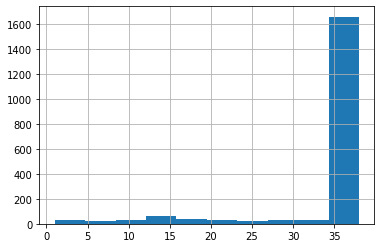

In [53]:
full_data.groupby(['name', 'season']).count()['gw'].hist()

In [54]:
full_data.groupby(['name', 'season']).count().reset_index().shape

(1951, 52)

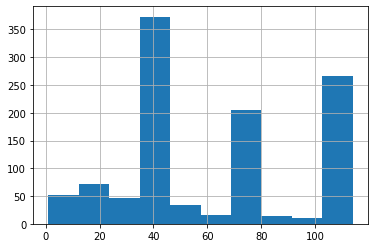

In [55]:
full_data.groupby(['name']).count()['gw'].hist()

In [56]:
full_data.groupby(['name']).count().reset_index().shape

(1089, 52)

In [57]:
full_data.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [58]:
full_data.shape

(67797, 52)

# TODO May make sense to remove 0 minutes players first

We have to remove all subsequent gameweeks for players who are randomly sampled so set sample proportion at 0.5% initially to acheive 20% in test overall

In [59]:
total_rand_sample_prop = 0.005

In [60]:
total_random_samples = int(total_rand_sample_prop * full_data.shape[0])
# Take more random samples from more recent seasons
random_samples_1819 = int(0.5 * total_random_samples)
random_samples_1718 = int(0.3 * total_random_samples)
random_samples_1617 = int(0.2 * total_random_samples)

In [61]:
random_rows = pd.concat(
    [
        full_data.sample(n=random_samples_1819),
        full_data.sample(n=random_samples_1718),
        full_data.sample(n=random_samples_1617)
    ],
    ignore_index=True
)
print(random_rows.shape)
random_rows.drop_duplicates(inplace=True)
print(random_rows.shape)

(337, 52)
(337, 52)


In [62]:
random_rows.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May
0,lys_mousset,Bournemouth,14,2018-19,0,0,3,0,0.5,0,0,0.3,0.0,5,0,0,0,0,0,12449,1,3,2.0,1,-67,171,238,4.9,False,0,0,0,0,1,0,0,Manchester City,0,1,0,0,684,0,0,0,0,1,0,0,0,0,0
1,sam_baldock,Brighton & Hove Albion,35,2018-19,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,18978,0,0,0.0,0,-10,20,30,4.5,False,0,0,0,0,1,0,0,Wolverhampton Wanderers,1,0,0,0,937,0,0,0,0,0,0,0,0,1,0
2,zlatan_ibrahimovic,Manchester United,13,2017-18,0,0,2,0,16.3,0,0,3.8,0.6,28,0,0,0,0,0,19592,0,1,21.0,1,8515,11395,2880,10.0,True,0,0,1,0,1,0,0,Brighton & Hove Albion,1,0,0,0,1086,0,0,0,1,0,0,0,0,0,0
3,anthony_knockaert,Brighton & Hove Albion,15,2017-18,0,0,12,0,6.8,3,0,1.3,4.0,69,0,0,0,0,0,45202,5,1,2.0,2,-2763,781,3544,5.7,True,0,1,0,0,0,0,1,Liverpool,0,1,0,0,92,0,0,0,0,1,0,0,0,0,0
4,jonjoe_kenny,Everton,27,2017-18,0,0,3,0,15.6,1,0,3.2,14.4,45,0,0,0,0,0,227033,1,3,2.0,1,-25707,4797,30504,4.4,True,0,0,0,1,0,0,0,Crystal Palace,0,0,0,0,551,0,0,0,0,0,0,1,0,0,0


In [63]:
random_rows['in_test_set'] = 1

In [64]:
full_data.shape

(67797, 52)

In [65]:
full_data_combined = full_data.merge(
    random_rows,
    on=list(random_rows.columns).remove('in_test_set'),
    how='left'
)
assert full_data_combined.shape[0] == full_data.shape[0]
full_data_combined.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,in_test_set
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,NaN
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,NaN
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,NaN
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,NaN
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,NaN


In [66]:
full_data_combined['in_test_set'] = full_data_combined.groupby('name')['in_test_set'].fillna(method='ffill')
full_data_combined.fillna(0, inplace=True)
full_data_combined.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,in_test_set
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0.0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0


In [67]:
full_data_combined['in_test_set'].sum() / full_data_combined.shape[0]

0.17552399073705327

Check that worked as intended

In [68]:
random_rows.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,in_test_set
0,lys_mousset,Bournemouth,14,2018-19,0,0,3,0,0.5,0,0,0.3,0.0,5,0,0,0,0,0,12449,1,3,2.0,1,-67,171,238,4.9,False,0,0,0,0,1,0,0,Manchester City,0,1,0,0,684,0,0,0,0,1,0,0,0,0,0,1
1,sam_baldock,Brighton & Hove Albion,35,2018-19,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,18978,0,0,0.0,0,-10,20,30,4.5,False,0,0,0,0,1,0,0,Wolverhampton Wanderers,1,0,0,0,937,0,0,0,0,0,0,0,0,1,0,1
2,zlatan_ibrahimovic,Manchester United,13,2017-18,0,0,2,0,16.3,0,0,3.8,0.6,28,0,0,0,0,0,19592,0,1,21.0,1,8515,11395,2880,10.0,True,0,0,1,0,1,0,0,Brighton & Hove Albion,1,0,0,0,1086,0,0,0,1,0,0,0,0,0,0,1
3,anthony_knockaert,Brighton & Hove Albion,15,2017-18,0,0,12,0,6.8,3,0,1.3,4.0,69,0,0,0,0,0,45202,5,1,2.0,2,-2763,781,3544,5.7,True,0,1,0,0,0,0,1,Liverpool,0,1,0,0,92,0,0,0,0,1,0,0,0,0,0,1
4,jonjoe_kenny,Everton,27,2017-18,0,0,3,0,15.6,1,0,3.2,14.4,45,0,0,0,0,0,227033,1,3,2.0,1,-25707,4797,30504,4.4,True,0,0,0,1,0,0,0,Crystal Palace,0,0,0,0,551,0,0,0,0,0,0,1,0,0,0,1


In [69]:
full_data_combined[full_data_combined['name'] == 'kyle_walker'][['name', 'team_name', 'gw', 'season', 'in_test_set']]

,name,team_name,gw,season,in_test_set
38713,kyle_walker,Tottenham Hotspur,1,2016-17,0.0
38714,kyle_walker,Tottenham Hotspur,2,2016-17,0.0
38715,kyle_walker,Tottenham Hotspur,3,2016-17,0.0
38716,kyle_walker,Tottenham Hotspur,4,2016-17,0.0
38717,kyle_walker,Tottenham Hotspur,5,2016-17,0.0
38718,kyle_walker,Tottenham Hotspur,6,2016-17,0.0
38719,kyle_walker,Tottenham Hotspur,7,2016-17,0.0
38720,kyle_walker,Tottenham Hotspur,8,2016-17,0.0
38721,kyle_walker,Tottenham Hotspur,9,2016-17,0.0
38722,kyle_walker,Tottenham Hotspur,10,2016-17,0.0


In [70]:
test_set = full_data_combined[full_data_combined['in_test_set'] == 1]
print(f"Test set size: {test_set.shape}")
training_set = full_data_combined[full_data_combined['in_test_set'] == 0]
print(f"Training set size: {training_set.shape}")

Test set size: (11900, 53)
Training set size: (55897, 53)


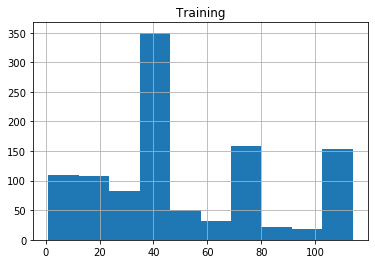

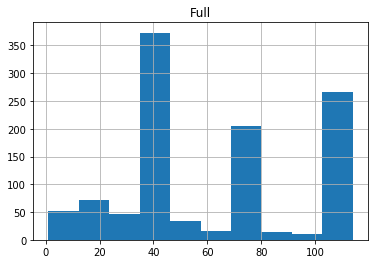

In [71]:
training_set.groupby(['name']).count()['gw'].hist()
plt.title('Training')
plt.show()
full_data.groupby(['name']).count()['gw'].hist()
plt.title('Full')
plt.show()

In [72]:
training_set.groupby(['name']).count().reset_index().shape[0]

1083

In [73]:
training_set['total_number_of_gameweeks'] = training_set.groupby(['name']).transform('count')['team_name']

/anaconda3/envs/fpl_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


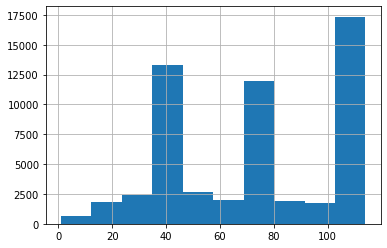

In [74]:
training_set['total_number_of_gameweeks'].hist()

## Create validation set

In [75]:
total_rand_sample_prop = 0.005

In [76]:
total_random_samples = int(total_rand_sample_prop * training_set.shape[0])
# Take more random samples from more recent seasons
random_samples_1819 = int(0.5 * total_random_samples)
random_samples_1718 = int(0.3 * total_random_samples)
random_samples_1617 = int(0.2 * total_random_samples)

# TODO Need to modify to filter on season

In [77]:
random_rows = pd.concat(
    [
        training_set.sample(n=random_samples_1819),
        training_set.sample(n=random_samples_1718),
        training_set.sample(n=random_samples_1617)
    ],
    ignore_index=True
)
print(random_rows.shape)
random_rows.drop_duplicates(inplace=True)
print(random_rows.shape)

(277, 54)
(276, 54)


In [78]:
random_rows.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,in_test_set,total_number_of_gameweeks
0,marko_grujic,Liverpool,15,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9788,2,2,0.0,0,-174,49,223,4.3,True,0,0,0,0,0,0,1,West Ham United,0,0,0,0,713,0,0,0,0,1,0,0,0,0,0,0.0,76
1,josh_murphy,Cardiff City,28,2018-19,0,0,-4,0,0.8,1,0,0.1,0.0,22,0,0,0,0,0,16535,3,0,2.0,0,-450,116,566,4.8,True,1,1,0,0,0,0,1,Everton,0,0,1,0,574,0,0,0,0,0,0,1,0,0,0,0.0,38
2,ciaran_clark,Newcastle United,23,2018-19,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,12190,0,3,0.0,0,432,1490,1058,4.5,True,0,0,0,1,0,0,0,Cardiff City,1,0,0,0,207,0,0,0,0,0,1,0,0,0,0,0.0,76
3,jermain_defoe,Bournemouth,31,2017-18,0,0,3,0,0.0,0,0,0.3,1.0,17,0,0,0,0,0,88529,1,2,2.0,1,3020,3469,449,7.6,True,0,0,0,0,1,0,0,West Bromwich Albion,0,0,0,0,505,0,0,0,0,0,0,0,1,0,0,0.0,114
4,gökhan_töre,West Ham United,14,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,3744,5,1,0.0,0,-57,5,62,5.4,True,0,0,0,0,0,0,1,Arsenal,0,1,1,0,412,0,0,0,0,1,0,0,0,0,0,0.0,38


In [79]:
random_rows['in_validation_set'] = 1

In [80]:
training_data_combined = training_set.merge(
    random_rows,
    on=list(random_rows.columns).remove('in_validation_set'),
    how='left'
)
assert training_data_combined.shape[0] == training_set.shape[0]
training_data_combined.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,in_test_set,total_number_of_gameweeks,in_validation_set
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0.0,114,NaN
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,114,NaN
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,114,NaN
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,114,NaN
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,114,NaN


In [81]:
training_data_combined['in_validation_set'] = training_data_combined.groupby('name')['in_validation_set'].fillna(method='ffill')
training_data_combined.fillna(0, inplace=True)
training_data_combined.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,in_test_set,total_number_of_gameweeks,in_validation_set
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0.0,114,0.0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,114,0.0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,114,0.0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,114,0.0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,114,0.0


In [82]:
training_data_combined['in_validation_set'].sum() / training_data_combined.shape[0]

0.15524983451705815

In [83]:
validation_set = training_data_combined[training_data_combined['in_validation_set'] == 1]
print(f"Validation set size: {test_set.shape}")
training_subset = training_data_combined[training_data_combined['in_validation_set'] == 0]
print(f"Training subset size: {training_subset.shape}")

Validation set size: (11900, 53)
Training subset size: (47219, 55)


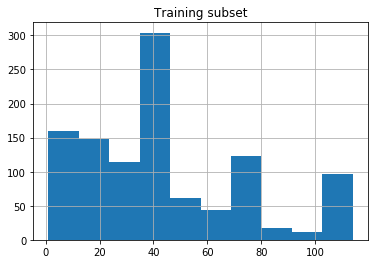

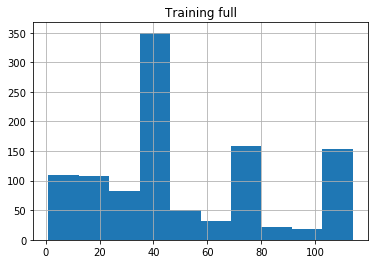

In [84]:
training_subset.groupby(['name']).count()['gw'].hist()
plt.title('Training subset')
plt.show()
training_set.groupby(['name']).count()['gw'].hist()
plt.title('Training full')
plt.show()

In [85]:
training_subset.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,in_test_set,total_number_of_gameweeks,in_validation_set
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0.0,114,0.0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,114,0.0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0.0,114,0.0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,114,0.0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.0,114,0.0


In [86]:
training_subset['total_number_of_gameweeks'] = training_subset.groupby(['name']).transform('count')['team_name']

/anaconda3/envs/fpl_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
print(training_subset.shape)
training_subset = training_subset[training_subset['total_number_of_gameweeks'] >= 7]
print(training_subset.shape)

(47219, 55)
(46935, 55)


In [88]:
training_subset.drop('total_number_of_gameweeks', axis=1, inplace=True)

In [89]:
training_subset.drop(['ID', 'in_test_set', 'in_validation_set'], axis=1, inplace=True)

In [90]:
training_subset.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May
0,aaron_cresswell,West Ham United,1,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,14023,1,2,0.0,0,0,0,0,5.5,False,0,0,0,1,0,0,0,Chelsea,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,aaron_cresswell,West Ham United,2,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,11531,0,1,0.0,0,-3002,79,3081,5.5,True,0,0,0,1,0,0,0,Bournemouth,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,aaron_cresswell,West Ham United,3,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,9587,1,3,0.0,0,-2053,28,2081,5.4,False,0,0,0,1,0,0,0,Manchester City,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,aaron_cresswell,West Ham United,4,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,8427,4,2,0.0,0,-1221,45,1266,5.4,True,0,0,0,1,0,0,0,Watford,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,aaron_cresswell,West Ham United,5,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,7933,2,4,0.0,0,-520,29,549,5.4,False,0,0,0,1,0,0,0,West Bromwich Albion,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [91]:
training_subset.to_parquet(r"/Users/stevengeorge/Documents/Github/LSTM-test/data/training_subset.parquet", index=False)

In [92]:
validation_set.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,ID,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May,in_test_set,total_number_of_gameweeks,in_validation_set
631,abel_hernández,Hull City,36,2016-17,0,0,12,0,23.8,2,0,9.5,16.8,90,0,0,0,0,0,49226,2,0,54.0,2,2664,4795,2131,5.9,True,0,1,0,0,1,0,0,Sunderland,0,0,0,0,12,0,0,0,0,0,0,0,0,0,1,0.0,38,1.0
632,abel_hernández,Hull City,37,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,46421,0,4,0.0,0,-2860,532,3392,5.9,False,0,1,0,0,1,0,0,Crystal Palace,0,0,0,1,12,0,0,0,0,0,0,0,0,0,1,0.0,38,1.0
633,abel_hernández,Hull City,38,2016-17,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,42507,7,1,0.0,0,-3938,86,4024,5.9,True,0,1,0,0,1,0,0,Tottenham Hotspur,0,1,0,0,12,0,0,0,0,0,0,0,0,0,1,0.0,38,1.0
867,adam_lallana,Liverpool,38,2016-17,0,1,30,1,61.1,0,1,15.8,51.6,90,0,0,0,0,0,410820,0,3,45.0,9,25020,27904,2884,6.7,True,0,0,0,0,0,0,1,Middlesbrough,1,0,0,0,18,0,0,0,0,0,0,0,0,0,1,0.0,114,1.0
868,adam_lallana,Liverpool,1,2017-18,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,45019,3,3,0.0,0,0,0,0,7.5,False,0,0,1,0,0,0,1,Watford,0,0,0,1,18,1,0,0,0,0,0,0,0,0,0,0.0,114,1.0


In [93]:
validation_set['total_number_of_gameweeks'] = validation_set.groupby(['name']).transform('count')['team_name']

/anaconda3/envs/fpl_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
print(validation_set.shape)
validation_set = validation_set[validation_set['total_number_of_gameweeks'] >= 7]
print(validation_set.shape)

(8678, 55)
(8585, 55)


In [95]:
validation_set.drop('total_number_of_gameweeks', axis=1, inplace=True)

In [96]:
validation_set.drop(['ID', 'in_test_set', 'in_validation_set'], axis=1, inplace=True)

In [97]:
validation_set.head()

,name,team_name,gw,season,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,promoted_side,top_6_last_season,position_DEF,position_FWD,position_GK,position_MID,team_name_opponent,promoted_side_opponent,top_6_last_season_opponent,late_kickoff,early_kickoff,kickoff_month_Aug,kickoff_month_Sep,kickoff_month_Oct,kickoff_month_Nov,kickoff_month_Dec,kickoff_month_Jan,kickoff_month_Feb,kickoff_month_Mar,kickoff_month_Apr,kickoff_month_May
867,adam_lallana,Liverpool,38,2016-17,0,1,30,1,61.1,0,1,15.8,51.6,90,0,0,0,0,0,410820,0,3,45.0,9,25020,27904,2884,6.7,True,0,0,0,0,0,0,1,Middlesbrough,1,0,0,0,0,0,0,0,0,0,0,0,0,1
868,adam_lallana,Liverpool,1,2017-18,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,45019,3,3,0.0,0,0,0,0,7.5,False,0,0,1,0,0,0,1,Watford,0,0,0,1,1,0,0,0,0,0,0,0,0,0
869,adam_lallana,Liverpool,2,2017-18,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,30675,0,1,0.0,0,-15600,401,16001,7.5,True,0,0,1,0,0,0,1,Crystal Palace,0,0,0,0,1,0,0,0,0,0,0,0,0,0
870,adam_lallana,Liverpool,3,2017-18,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,24270,0,4,0.0,0,-6647,177,6824,7.4,True,0,0,1,0,0,0,1,Arsenal,0,1,0,0,1,0,0,0,0,0,0,0,0,0
871,adam_lallana,Liverpool,4,2017-18,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,21222,0,5,0.0,0,-3268,205,3473,7.4,False,0,0,1,0,0,0,1,Manchester City,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [98]:
validation_set.to_parquet(r"/Users/stevengeorge/Documents/Github/LSTM-test/data/validation_set.parquet", index=False)